In [2]:
import pandas as pd

In [13]:
data = pd.read_csv('data/visits.csv', sep='\t')
data

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк
...,...,...,...,...
317099,20180408T053133,9cdb5039,11.0,Гейхера
317100,20180403T021353,9cdb5039,181.0,Гейхера
317101,20180408T062636,9cdb5039,252.0,Гейхера
317102,20180405T232425,9cdb5039,29.0,Гейхера


#### 1. Сводные таблицы используют на разных этапах работы с данными. Можно начать с оценки данных и посчитать среднее время заправки в секундах. Нужные значения хранит столбец time_spent.С помощью pivot_table() вычислите среднее время, проведённое на заправках в каждой из сетей, и сохраните результат в переменную name_stat.Выведите на экран значение переменной name_stat и проанализируйте полученные данные. Не забудьте, что time_spent хранит значения в секундах.

In [14]:
name_stat = data.pivot_table(index='name', values='time_spent', aggfunc='mean')
name_stat

,time_spent
name,
Агератум,337.802721
Амарант,132.760012
Аммобиум,256.708042
Арктотис,73.879984
Астильба,376.143149
Бальзамин,134.508411
Бархатцы,145.300328
Бегония,163.200647
Белоцветник,100.818966


#### 2. Найдите количество заездов на АЗС. Одна строка в датафрейме соответствует одному посещению, значит, нужно посчитать строки.
Сохраните количество строк датафрейма в переменную total_visits.

In [16]:
total_visits = data.shape[0]
print('Кол-во заездов на азс', total_visits)

Кол-во заездов на азс 317104


#### 3. Теперь нужно понять, сколько АЗС в данных. 

In [20]:
total_stations = data['id'].unique().shape[0]
total_stations

471

#### 4. Аналитику могут сообщить, за какой срок собрали данные. Эту информацию лучше перепроверить. Понадобится столбец date_time, который хранит время прибытия водителей на АЗС. Выведите минимальное и максимальное значения столбца date_time через пробел, вызвав функцию print() только один раз. Добавлять к выводу дополнительный текст или сохранять значения в переменные не нужно.

In [24]:
print(str(data['date_time'].min()) + ' ' + str(data['date_time'].max()))

20180402T000008 20180408T235957


#### 5. Записи в столбце date_time хранятся в формате ISO: YYYYMMDDTHHMMSS. T — разделитель между датой и временем. В предыдущей задаче вы обнаружили, что первая дата прибытия на АЗС — 2 апреля 2018 года в 00:00, а последняя — 8 апреля 2018 года в 23:59. Значит, данные покрывают семь дней. Теперь можно найти среднее количество посещений АЗС за день.
- Сохраните в переменную total_days количество дней.
- В переменную station_visits_per_day запишите среднее количество визитов на АЗС за день. Чтобы посчитать среднее, используйте значения переменных total_visits, total_stations и total_days .

In [34]:
total_days = 7
station_visits_per_day = total_visits / total_stations / total_days
print('Количество заездов на АЗС в сутки:', station_visits_per_day)

Количество заездов на АЗС в сутки: 96.17955717318775


#### 6. Вы только что нашли среднее количество заездов за день. Но будьте осторожны со средними значениями. На них влияет даже небольшое количество экстремально малых или больших значений в данных. Поэтому важно смотреть на общее распределение.
#### Проверьте распределение числа заездов по сетям АЗС. Можно ожидать, что больше заездов будет на популярных станциях.
#### Выведите на экран 10 сетей АЗС с наибольшим количеством заездов, вызвав метод value_counts() для нужного столбца. Метод автоматически отсортирует данные по убыванию количества посещений, поэтому дополнительная сортировка не понадобится.
Посчитайте количество уникальных значений в столбце name.
Убедитесь, что данные отсортированы в порядке убывания, и выведите первые 10 строк.

In [35]:
data['name'].value_counts().head(10)

Календула      85648
Василёк        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: name, dtype: int64

#### 7. Медианные и средние значения недостаточно характеризуют данные. Настало время посмотреть на распределение значений. Постройте гистограмму по значениям времени, проведённого на АЗС.

<AxesSubplot:>

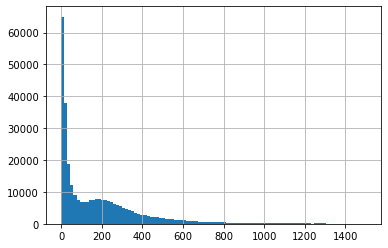

In [44]:
data['time_spent'].hist(bins=100, range=(0, 1500))

#### 8. Нарисуйте диаграмму размаха для data, ограничив диапазон по вертикали значениями -100 и 1000.

In [46]:
import matplotlib.pyplot as plt

<AxesSubplot:>

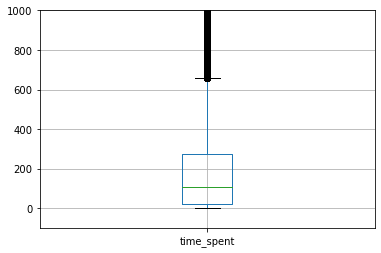

In [50]:
plt.ylim(-100, 1000)
data.boxplot(column='time_spent')